In [6]:
using FuzzyClusteringSimilarity
using Statistics
using Printf
using Plots

pythonplot()

Plots.PythonPlotBackend()

## Make Data

In [2]:
unevenLowFuzzy = [[0.98, 0.01, 0.01] [0.98, 0.01, 0.01] [0.98, 0.01, 0.01] [0.98, 0.01, 0.01] [0.98, 0.01, 0.01] [0.98, 0.01, 0.01] [0.01, 0.98, 0.01] [0.98, 0.01, 0.01] [0.01, 0.01, 0.98] ]
evenLowFuzzy   = [[0.98, 0.01, 0.01] [0.98, 0.01, 0.01] [0.98, 0.01, 0.01] [0.01, 0.98, 0.01] [0.01, 0.98, 0.01] [0.01, 0.98, 0.01] [0.01, 0.01, 0.98] [0.01, 0.01, 0.98] [0.01, 0.01, 0.98] ]  
highFuzzy      = [[0.34, 0.33, 0.33] [0.36, 0.32, 0.32] [0.40, 0.25, 0.35] [0.33, 0.34, 0.33] [0.32, 0.32, 0.36] [0.25, 0.40, 0.35] [0.33, 0.33, 0.34] [0.32, 0.32, 0.36] [0.35, 0.40, 0.25] ]
unevenHard     = [[1, 0, 0] [1, 0, 0] [1, 0, 0] [1, 0, 0] [1, 0, 0] [1, 0, 0] [0, 1, 0] [1, 0, 0] [0, 0, 1] ]
evenHard       = [[1, 0, 0] [1, 0, 0] [1, 0, 0] [0, 1, 0] [0, 1, 0] [0, 1, 0] [0, 0, 1] [0, 0, 1] [0, 0, 1] ]

3×9 Matrix{Int64}:
 1  1  1  0  0  0  0  0  0
 0  0  0  1  1  1  0  0  0
 0  0  0  0  0  0  1  1  1

## Comparisons

In [3]:
permutation = [
    andc(unevenLowFuzzy, evenLowFuzzy, "perm"),
    andc(unevenLowFuzzy, highFuzzy, "perm"),
    andc(unevenLowFuzzy, unevenHard, "perm"),
    andc(unevenLowFuzzy, evenHard, "perm"),
    andc(evenLowFuzzy, highFuzzy, "perm"),
    andc(evenLowFuzzy, unevenHard, "perm"),
    andc(evenLowFuzzy, evenHard, "perm"),
    andc(highFuzzy, unevenHard, "perm"),
    andc(highFuzzy, evenHard, "perm"),
    andc(unevenHard, evenHard, "perm")
]

fitted = [
    andc(unevenLowFuzzy, evenLowFuzzy, "fit"),
    andc(unevenLowFuzzy, highFuzzy, "fit"),
    andc(unevenLowFuzzy, unevenHard, "fit"),
    andc(unevenLowFuzzy, evenHard, "fit"),
    andc(evenLowFuzzy, highFuzzy, "fit"),
    andc(evenLowFuzzy, unevenHard, "fit"),
    andc(evenLowFuzzy, evenHard, "fit"),
    andc(highFuzzy, unevenHard, "fit"),
    andc(highFuzzy, evenHard, "fit"),
    andc(unevenHard, evenHard, "fit")
]

symmetric = [
    andc(unevenLowFuzzy, evenLowFuzzy, "sym"),
    andc(unevenLowFuzzy, highFuzzy,"sym"),
    andc(unevenLowFuzzy, unevenHard,"sym"),
    andc(unevenLowFuzzy, evenHard,"sym"),
    andc(evenLowFuzzy, highFuzzy,"sym"),
    andc(evenLowFuzzy, unevenHard,"sym"),
    andc(evenLowFuzzy, evenHard,"sym"),
    andc(highFuzzy, unevenHard,"sym"),
    andc(highFuzzy, evenHard,"sym"),
    andc(unevenHard, evenHard,"sym")
]

flat = [
    andc(unevenLowFuzzy, evenLowFuzzy, "flat"),
    andc(unevenLowFuzzy, highFuzzy, "flat"),
    andc(unevenLowFuzzy, unevenHard, "flat"),
    andc(unevenLowFuzzy, evenHard, "flat"),
    andc(evenLowFuzzy, highFuzzy, "flat"),
    andc(evenLowFuzzy, unevenHard, "flat"),
    andc(evenLowFuzzy, evenHard, "flat"),
    andc(highFuzzy, unevenHard, "flat"),
    andc(highFuzzy, evenHard, "flat"),
    andc(unevenHard, evenHard, "flat")
]

unadjusted = [
    ndc(unevenLowFuzzy, evenLowFuzzy),
    ndc(unevenLowFuzzy, highFuzzy),
    ndc(unevenLowFuzzy, unevenHard),
    ndc(unevenLowFuzzy, evenHard),
    ndc(evenLowFuzzy, highFuzzy),
    ndc(evenLowFuzzy, unevenHard),
    ndc(evenLowFuzzy, evenHard),
    ndc(highFuzzy, unevenHard),
    ndc(highFuzzy, evenHard),
    ndc(unevenHard, evenHard)
]

10-element Vector{Float64}:
 0.5150000000000001
 0.5902777777777777
 0.9875
 0.49250000000000005
 0.3041666666666667
 0.5025
 0.9775
 0.5777777777777777
 0.28166666666666673
 0.5

In [9]:
sortedFlat = sortperm(flat, rev=true)
sortedFit = sortperm(fitted, rev=true)
sortedPerm = sortperm(permutation, rev=true)
sortedSym = sortperm(symmetric, rev=true)
sortedUnadjusted = sortperm(unadjusted, rev=true)

@printf("%5s %5s %5s %5s %5s", "NDC", "Perm", "Fit", "Sym", "Flat")
println()
for i in 1:10
    @printf("%5i %5i %5i %5i %5i", sortedUnadjusted[i], sortedPerm[i], sortedFit[i], sortedSym[i], sortedFlat[i])
    println()
end

  NDC  Perm   Fit   Sym  Flat
    3     3     3     3     3
    7     7     7     7     7
    2     1    10     8     2
    8    10     6     2     8
    1     6     2     6     1
    6     4     4     4     6
   10     2     8     9    10
    4     8     9    10     4
    5     9     5     5     5
    9     5     1     1     9


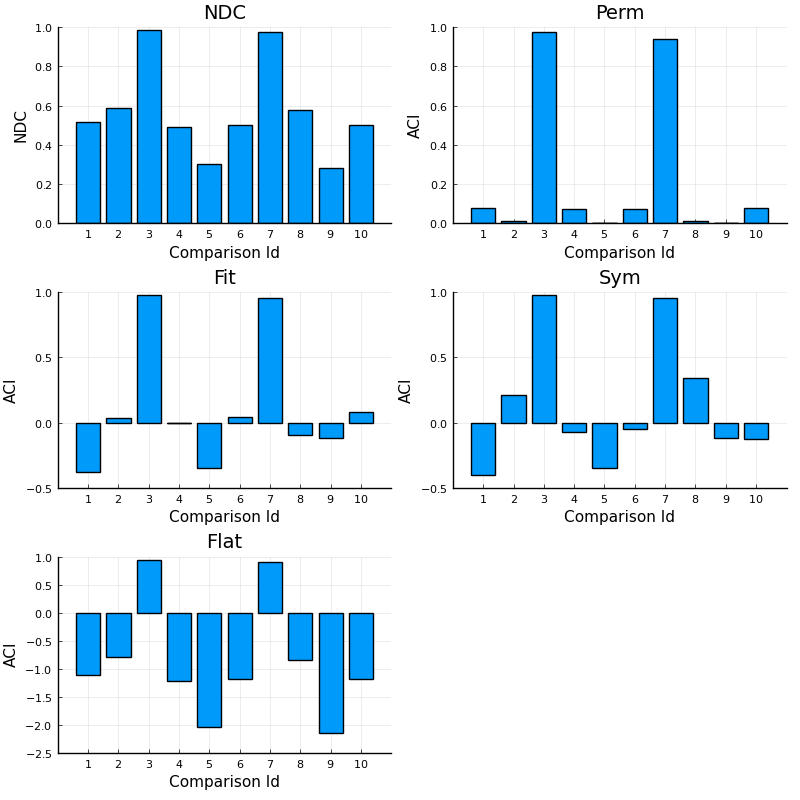

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [21]:
p = Plots.plot(size = (800, 800), layout=grid(3,2, widths=[0.5, 0.5, 0.5, 0.5, 0.5], heights=[0.33, 0.33, 0.33, 0.33, 0.33]), title=["NDC" "Perm" "Fit" "Sym" "Flat"])
Plots.bar!(unadjusted, subplot=1, legend=false, xticks=1:10, xlabel="Comparison Id", ylabel="NDC", ylims=(0, 1))
Plots.bar!(permutation, subplot=2, legend=false, xticks=1:10, xlabel="Comparison Id", ylabel="ACI", ylims=(0, 1))
Plots.bar!(fitted, subplot=3, legend=false, xticks=1:10, xlabel="Comparison Id", ylabel="ACI", ylims=(-0.5, 1))
Plots.bar!(symmetric, subplot=4, legend=false, xticks=1:10, xlabel="Comparison Id", ylabel="ACI", ylims=(-0.5, 1))
Plots.bar!(flat, subplot=5, legend=false, xticks=1:10, xlabel="Comparison Id", ylabel="ACI", ylims=(-2.5, 1))
Plots.plot!(subplot=6, legend=false,grid=false,foreground_color_subplot=:white) 
#Plots.savefig("ACIBarCharts.eps")

## Correlation Matrix Excluding Comparisons 3 and 7

In [13]:
function remove37(vect)
    new = deepcopy(vect)
    deleteat!(new, 3)
    deleteat!(new, 6)
    return new
end

permM2 = remove37(permutation)
fitM2 = remove37(fitted)
symM2 = remove37(symmetric)
flatM2 = remove37(flat)

correlations = zeros(4,4)
correlations[1, 2] = cor(permM2, fitM2)
correlations[1, 3] = cor(permM2, symM2)
correlations[1, 4] = cor(permM2, flatM2)
correlations[2, 3] = cor(fitM2, symM2)
correlations[2, 4] = cor(fitM2, flatM2)
correlations[3, 4] = cor(symM2, flatM2)

correlations

4×4 Matrix{Float64}:
 0.0  0.237036  -0.303806  0.414176
 0.0  0.0        0.622749  0.41793
 0.0  0.0        0.0       0.57444
 0.0  0.0        0.0       0.0